## Project Type: Exploratory Data Analysis
### Project Number: 2
# Project Title: Разведочный анализ расхода электроэнергии на примере тяговых подстанция Забайкалькой железной дороги. 

---


# **STAGE 1. PROBLEM DEFINITION**





### Project Objectives

---

- Исследовать распределение расхода электроэнергии по вводам тяговых подстанций

### Success criteria

---

Подготовленые данные для построения модеей машинного обучения 

### Termenology

---

- ФКС - фидер контактной сети 
- ТП - тяговая подстанция
- СТЭ - система тягвого электроснабжения 

### Task type

---

Подгоовка данных для задачи прогнозирования временных рядов 

    
# **STAGE 2.DATA PREPARATION**



### _Import Libraries_

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Time series 
import datetime
import statsmodels.api as sm

### _Import Data_

---

In [2]:
data_path = 'D:/Data_Science_Project/7. Time series analysis/Project 2/Raskhod_EP_24_03_2020.csv'

# data_path = '/media/ruslan/Data/Результаты измерений СТЭ - Сентябрь 2020/0758 - ТП Сохондо - ФКС 4 (ЦЗА)/0758_ТП_Сохондо_ФКС_4_ЦЗА_EDA.csv'

### _Collect initial data_

---

In [3]:
# Загрузим набор даннх для первичного визуального анализа 
power_consumption = pd.read_csv(data_path, sep=';')
power_consumption.head()

,Ввод подстанции,Date,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Расход,Макс.
0,Бада - Ввод Т1 27.5 кВ,01.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Бада - Ввод Т1 27.5 кВ,02.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Бада - Ввод Т1 27.5 кВ,03.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Бада - Ввод Т1 27.5 кВ,04.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Бада - Ввод Т1 27.5 кВ,05.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [4]:
power_consumption.tail()

,Ввод подстанции,Date,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,Расход,Макс.
32020,Новая - Ввод Т2 27.5 кВ,29.02.2020,10023.0,8875.0,5788.0,7143.0,10006.0,6431.0,7214.0,8474.0,...,3263.0,7174.0,8147.0,7700.0,8316.0,7148.0,7863.0,8186.0,178143,10023
32021,Новая - Ввод Т2 27.5 кВ,01.03.2020,10045.0,10424.0,8378.0,8424.0,8485.0,6569.0,7014.0,8826.0,...,8719.0,8393.0,6714.0,7790.0,7786.0,5947.0,7812.0,7894.0,195943,10424
32022,Новая - Ввод Т2 27.5 кВ,02.03.2020,8136.0,6215.0,5141.0,4952.0,4855.0,4066.0,5370.0,7183.0,...,2138.0,1362.0,409.0,464.0,821.0,631.0,3337.0,4992.0,111815,8532
32023,Новая - Ввод Т2 27.5 кВ,03.03.2020,4440.0,4224.0,1899.0,5546.0,7229.0,4607.0,4200.0,4468.0,...,9079.0,7066.0,6833.0,8067.0,8591.0,9082.0,8347.0,8402.0,168307,10160
32024,Новая - Ввод Т2 27.5 кВ,04.03.2020,9832.0,9979.0,8107.0,8917.0,11284.0,10846.0,6127.0,7498.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118463,11284


In [5]:
# Форма исходного набора данных
print("Форма исходного набора данных:\n{}".format(power_consumption.shape))

Форма исходного набора данных:
(32025, 28)


In [6]:
# Список переменных
power_consumption.columns.tolist()

['Ввод подстанции',
 'Date',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 'Расход',
 'Макс.']

In [7]:
# Cловарь переменных
list_of_variables = {'Ввод подстанции' : 'entering_substation',
                     'Date' : 'date',
                     'Расход' : 'consumption',
                     'Макс.' : 'max_consumption'}     

In [8]:
# Переобозначим переменные 
power_consumption = power_consumption.rename(columns = list_of_variables)

In [9]:
# Проверка результата
power_consumption.head()

,entering_substation,date,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,consumption,max_consumption
0,Бада - Ввод Т1 27.5 кВ,01.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Бада - Ввод Т1 27.5 кВ,02.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Бада - Ввод Т1 27.5 кВ,03.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Бада - Ввод Т1 27.5 кВ,04.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Бада - Ввод Т1 27.5 кВ,05.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [10]:
# Анализ типов данных
power_consumption.dtypes 

entering_substation     object
date                    object
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
9                      float64
10                     float64
11                     float64
12                     float64
13                     float64
14                     float64
15                     float64
16                     float64
17                     float64
18                     float64
19                     float64
20                     float64
21                     float64
22                     float64
23                     float64
24                     float64
consumption              int64
max_consumption          int64
dtype: object

### _Describe data_

---

- data - дата наблюдения
- entering_substation - наименование ввода подстанции 
- 1 - 24 - часы наблюдения  
- consumption - суммарный расход за сутки 
- max_consumption - максимальный расход за сутки


### _Verify data quality_

---

In [11]:
# Функция коплексной оценки качества данных 
def verify_data_quality (evaluated_dataset):
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 100+ '\n')
    # Проверка наличия значений NaN
    print("Пропущенные значения:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 100+ '\n')
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 100+ '\n')
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 100+ '\n')
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 100+ '\n')
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 100+ '\n')

In [12]:
# Оценка качетва данных
verify_data_quality(power_consumption)

Типы данных:
entering_substation     object
date                    object
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
9                      float64
10                     float64
11                     float64
12                     float64
13                     float64
14                     float64
15                     float64
16                     float64
17                     float64
18                     float64
19                     float64
20                     float64
21                     float64
22                     float64
23                     float64
24                     float64
consumption              int64
max_consumption          int64
dtype: object
____________________________________________________________________________________________________

Про

### _Data type conversions_

---

Преобразуем типы данных даты для анализа 

In [13]:
# Преобразование даты 
power_consumption['date'] = pd.to_datetime(power_consumption['date'])

In [14]:
# Проверка результата
power_consumption.head()

,entering_substation,date,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,consumption,max_consumption
0,Бада - Ввод Т1 27.5 кВ,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Бада - Ввод Т1 27.5 кВ,2016-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Бада - Ввод Т1 27.5 кВ,2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Бада - Ввод Т1 27.5 кВ,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Бада - Ввод Т1 27.5 кВ,2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [15]:
# Оценка результатов преобразования
power_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32025 entries, 0 to 32024
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   entering_substation  32025 non-null  object        
 1   date                 32025 non-null  datetime64[ns]
 2   1                    27132 non-null  float64       
 3   2                    27132 non-null  float64       
 4   3                    27132 non-null  float64       
 5   4                    27132 non-null  float64       
 6   5                    27132 non-null  float64       
 7   6                    27132 non-null  float64       
 8   7                    27132 non-null  float64       
 9   8                    27132 non-null  float64       
 10  9                    27132 non-null  float64       
 11  10                   27132 non-null  float64       
 12  11                   27132 non-null  float64       
 13  12                   27132 non-

### _Sorting, reordering, reindexing_

---

In [16]:
# Установим создание мультииндекса 
power_consumption = power_consumption.set_index(['date','entering_substation'])

In [17]:
# Оценка результатов переиндексации
power_consumption.index

MultiIndex([('2016-01-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-02-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-03-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-04-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-05-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-06-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-07-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-08-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-09-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-10-01',  'Бада - Ввод Т1 27.5 кВ'),
            ...
            ('2020-02-24', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-25', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-26', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-27', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-28', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-29', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-01-03', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-03', 'Новая - Ввод Т2 27.5 

In [18]:
# Индекс первого уровня
power_consumption.index.levels[0]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-08-01', '2020-08-02', '2020-09-01', '2020-09-02',
               '2020-10-01', '2020-10-02', '2020-11-01', '2020-11-02',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', name='date', length=1525, freq=None)

In [19]:
# Индекс второго уровня
power_consumption.index.levels[1]

Index(['Бада - Ввод Т1 27.5 кВ', 'Бада - Ввод Т2 27.5 кВ',
       'Белогорск - Ввод Т1 27.5 кВ', 'Белогорск - Ввод Т2 27.5 кВ',
       'Бушулей - Ввод Т1 27.5 кВ', 'Бушулей - Ввод Т2 27.5 кВ',
       'Завитая - Ввод Т1 27.5 кВ', 'Завитая - Ввод Т2 27.5 кВ',
       'Зилово - Ввод Т1 27.5 кВ', 'Зилово - Ввод Т3 27.5 кВ',
       'Карымская - Ввод Т1 27.5 кВ', 'Карымская - Ввод Т2 27.5 кВ',
       'Карымская - Ввод Т6 27.5 кВ', 'Магдагачи - Ввод Т1 27.5 кВ',
       'Магдагачи - Ввод Т2 27.5 кВ', 'Могзон - Ввод Т1 27.5 кВ',
       'Могзон - Ввод Т2 27.5 кВ', 'Могоча - Ввод Т1 27.5 кВ',
       'Могоча - Ввод Т2 27.5 кВ', 'Новая - Ввод Т1 27.5 кВ',
       'Новая - Ввод Т2 27.5 кВ'],
      dtype='object', name='entering_substation')

In [20]:
# Отбор списка ТП через индексирование 
power_consumption.index.levels[1].to_list()

['Бада - Ввод Т1 27.5 кВ',
 'Бада - Ввод Т2 27.5 кВ',
 'Белогорск - Ввод Т1 27.5 кВ',
 'Белогорск - Ввод Т2 27.5 кВ',
 'Бушулей - Ввод Т1 27.5 кВ',
 'Бушулей - Ввод Т2 27.5 кВ',
 'Завитая - Ввод Т1 27.5 кВ',
 'Завитая - Ввод Т2 27.5 кВ',
 'Зилово - Ввод Т1 27.5 кВ',
 'Зилово - Ввод Т3 27.5 кВ',
 'Карымская - Ввод Т1 27.5 кВ',
 'Карымская - Ввод Т2 27.5 кВ',
 'Карымская - Ввод Т6 27.5 кВ',
 'Магдагачи - Ввод Т1 27.5 кВ',
 'Магдагачи - Ввод Т2 27.5 кВ',
 'Могзон - Ввод Т1 27.5 кВ',
 'Могзон - Ввод Т2 27.5 кВ',
 'Могоча - Ввод Т1 27.5 кВ',
 'Могоча - Ввод Т2 27.5 кВ',
 'Новая - Ввод Т1 27.5 кВ',
 'Новая - Ввод Т2 27.5 кВ']

#### Создание переменных для анализа 

In [21]:
# Бада - Ввод Т1 27.5 кВ
bada_entering_t1 = power_consumption.xs('Бада - Ввод Т1 27.5 кВ', level=1)['consumption']

# Бада - Ввод Т2 27.5 кВ
bada_entering_t2 = power_consumption.xs('Бада - Ввод Т2 27.5 кВ', level=1)['consumption']

# Белогорск - Ввод Т1 27.5 кВ
belogorsk_entering_t1 = power_consumption.xs('Белогорск - Ввод Т1 27.5 кВ', level=1)['consumption']

# Белогорск - Ввод Т2 27.5 кВ
belogorsk_entering_t2 = power_consumption.xs('Белогорск - Ввод Т2 27.5 кВ', level=1)['consumption']

# Бушулей - Ввод Т1 27.5 кВ
bushuley_entering_t1 = power_consumption.xs('Бушулей - Ввод Т1 27.5 кВ', level=1)['consumption']

# Бушулей - Ввод Т2 27.5 кВ
bushuley_entering_t2 = power_consumption.xs('Бушулей - Ввод Т2 27.5 кВ', level=1)['consumption']

# Завитая - Ввод Т1 27.5 кВ
zavitaya_entering_t1 = power_consumption.xs('Завитая - Ввод Т1 27.5 кВ', level=1)['consumption']

# Завитая - Ввод Т2 27.5 кВ
zavitaya_entering_t2 = power_consumption.xs('Завитая - Ввод Т2 27.5 кВ', level=1)['consumption']

# Зилово - Ввод Т1 27.5 кВ
zilovo_entering_t1 = power_consumption.xs('Зилово - Ввод Т1 27.5 кВ', level=1)['consumption']

# Зилово - Ввод Т3 27.5 кВ
zilovo_entering_t3 = power_consumption.xs('Зилово - Ввод Т3 27.5 кВ', level=1)['consumption']

# Карымская - Ввод Т1 27.5 кВ
karymskaya_entering_t1 = power_consumption.xs('Карымская - Ввод Т1 27.5 кВ', level=1)['consumption']

# Карымская - Ввод Т2 27.5 кВ
karymskaya_entering_t2 = power_consumption.xs('Карымская - Ввод Т2 27.5 кВ', level=1)['consumption']

# Карымская - Ввод Т6 27.5 кВ
karymskaya_entering_t6 = power_consumption.xs('Карымская - Ввод Т6 27.5 кВ', level=1)['consumption']

# Магдагачи - Ввод Т1 27.5 кВ
magdagachi_entering_t1 = power_consumption.xs('Магдагачи - Ввод Т1 27.5 кВ', level=1)['consumption']

# Магдагачи - Ввод Т2 27.5 кВ
magdagachi_entering_t2 = power_consumption.xs('Магдагачи - Ввод Т2 27.5 кВ', level=1)['consumption']

# Могзон - Ввод Т1 27.5 кВ
mogzon_entering_t1 = power_consumption.xs('Могзон - Ввод Т1 27.5 кВ', level=1)['consumption']

# Могзон - Ввод Т2 27.5 кВ
mogzon_entering_t2 = power_consumption.xs('Могзон - Ввод Т2 27.5 кВ', level=1)['consumption']

# Могоча - Ввод Т1 27.5 кВ
mogocha_entering_t1 = power_consumption.xs('Могоча - Ввод Т1 27.5 кВ', level=1)['consumption']

# Могоча - Ввод Т2 27.5 кВ
mogocha_entering_t2 = power_consumption.xs('Могоча - Ввод Т2 27.5 кВ', level=1)['consumption']

# Новая - Ввод Т1 27.5 кВ
novaya_entering_t1 = power_consumption.xs('Новая - Ввод Т1 27.5 кВ', level=1)['consumption']

# Новая - Ввод Т2 27.5 кВ
novaya_entering_t2 = power_consumption.xs('Новая - Ввод Т2 27.5 кВ', level=1)['consumption']

### _Conclusions_

---

    
# **STAGE 3. DATA ANALYSIS**

# Section 1. Research

### _Descriptive Statistics_

---

In [ ]:
# Описательные статистики 
power_consumption.describe()

### _Distribution of data_

---

In [33]:
def distribution(data_for_eda):
    
    fig, ax = plt.subplots(1,3, figsize=(25, 5), dpi= 180)
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Распределение наблюдений", fontsize=18)
    
    sns.set_style("whitegrid")
    sns.histplot(data = data_for_eda, bins = 80, stat = 'density', kde = True, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.ecdfplot(data = data_for_eda, ax=ax[2])
    
    fig, ax = plt.subplots(1,1, figsize=(25, 5), dpi= 180)
    data_for_eda.plot()
    print("Описательные статистики:\n{}\n".format(data_for_eda.describe().round(2)) + '_' * 100+ '\n')
    print("Смещение:\n{}\n".format(data_for_eda.skew().round(2))+ '_' * 100+ '\n')
    print("Эксцесс:\n{}\n".format(data_for_eda.kurt().round(2)) + '_' * 100+ '\n')

#### Бада - Ввод Т1 27.5 кВ

Описательные статистики:
count      1093.00
mean     206910.99
std       31271.35
min       52572.00
25%      186618.00
50%      207072.00
75%      226141.00
max      509011.00
Name: consumption, dtype: float64
____________________________________________________________________________________________________

Смещение:
1.24
____________________________________________________________________________________________________

Эксцесс:
12.71
____________________________________________________________________________________________________



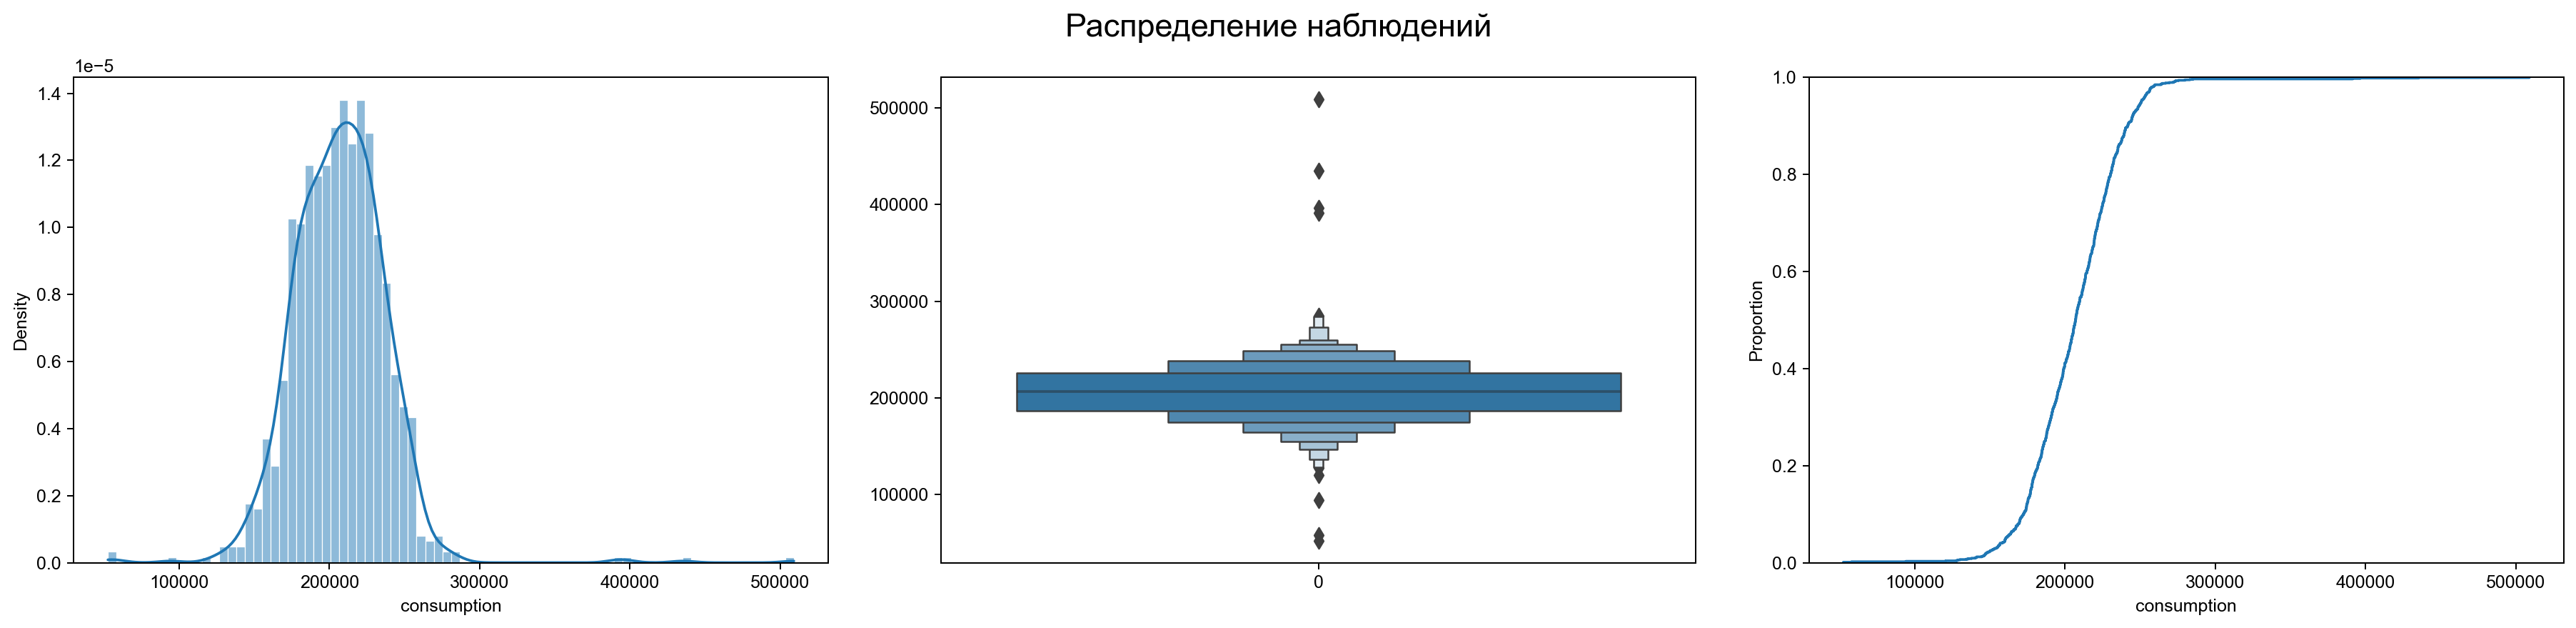

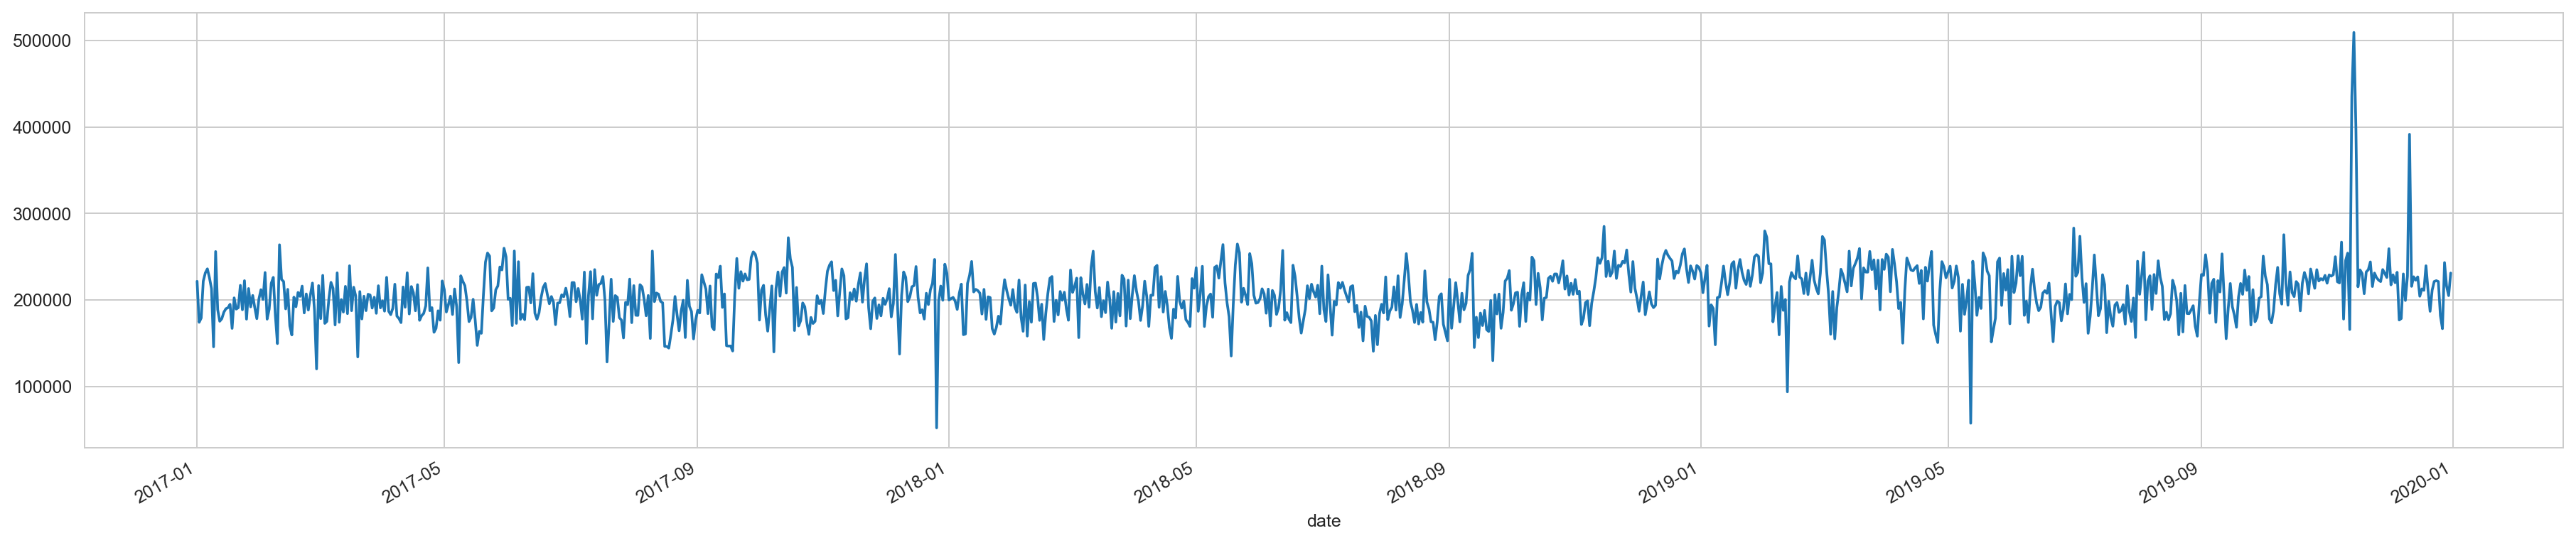

In [34]:
distribution(bada_entering_t1)

#### Бада - Ввод Т2 27.5 кВ

In [ ]:
distribution(bada_entering_t2)

#### Белогорск - Ввод Т1 27.5 кВ

In [ ]:
distribution(belogorsk_entering_t1)

#### Белогорск - Ввод Т2 27.5 кВ

In [ ]:
distribution(belogorsk_entering_t2)

#### Бушулей - Ввод Т1 27.5 кВ

In [ ]:
distribution(bushuley_entering_t1)

#### Бушулей - Ввод Т2 27.5 кВ

In [ ]:
distribution(bushuley_entering_t2)

#### Завитая - Ввод Т1 27.5 кВ

In [ ]:
distribution(zavitaya_entering_t1)

#### Завитая - Ввод Т2 27.5 кВ

In [ ]:
distribution(zavitaya_entering_t2)

#### Зилово - Ввод Т1 27.5 кВ

In [ ]:
distribution(zilovo_entering_t1)

#### Зилово - Ввод Т3 27.5 кВ

In [ ]:
distribution(zilovo_entering_t3)

#### Карымская - Ввод Т1 27.5 кВ

In [ ]:
distribution(karymskaya_entering_t1)

#### Карымская - Ввод Т2 27.5 кВ

In [ ]:
distribution(karymskaya_entering_t2)

#### Карымская - Ввод Т6 27.5 кВ

In [ ]:
distribution(karymskaya_entering_t6)

#### Магдагачи - Ввод Т1 27.5 кВ

In [ ]:
distribution(magdagachi_entering_t1)

#### Магдагачи - Ввод Т2 27.5 кВ

In [ ]:
distribution(magdagachi_entering_t2)

#### Могзон - Ввод Т1 27.5 кВ

In [ ]:
distribution(mogzon_entering_t1)

#### Могзон - Ввод Т2 27.5 кВ

In [ ]:
distribution(mogzon_entering_t2)

#### Могоча - Ввод Т1 27.5 кВ

In [ ]:
distribution(mogocha_entering_t1)

#### Могоча - Ввод Т2 27.5 кВ

In [ ]:
distribution(mogocha_entering_t2)

#### Новая - Ввод Т1 27.5 кВ

In [ ]:
distribution(novaya_entering_t1)

#### Новая - Ввод Т2 27.5 кВ

In [ ]:
distribution(novaya_entering_t2)


# Section 2. Conclusions

По результатам анализа распределения расходаэлектро энергии по годам и подстанциям можно сделать следующие выводы: 
- Актуальный переод наблюдений где имеются качественные данные для анализа находятся в диапазоне годов с 2017 по 2020. 
- Данные по ряду подстанций имеют крайне низкое качество и их лучше исключить из дальнейшего исследования: 
    - Карымская - Ввод Т1 27.5 кВ
    - Карымская - Ввод Т2 27.5 кВ
    - Могоча - Ввод Т1 27.5 кВ
    - Могоча - Ввод Т2 27.5 кВ


# **STAGE 4. DATA WRANGLING**



# Section 1. Clean data

### _Overview dataset_

---

In [ ]:
power_consumption.head()

In [ ]:
power_consumption.tail()

### _Filtering to the desired subset of data_

---

In [22]:
# Удаление из набора подстанций с некачественными данными 
power_consumption_filter =  power_consumption.drop(index=['Карымская - Ввод Т1 27.5 кВ','Карымская - Ввод Т2 27.5 кВ', 'Могоча - Ввод Т1 27.5 кВ',
'Могоча - Ввод Т2 27.5 кВ'], level=1)

In [23]:
# Проверка результатов
power_consumption_filter.iloc[power_consumption_filter.index.isin(['Карымская - Ввод Т1 27.5 кВ','Карымская - Ввод Т2 27.5 кВ', 'Могоча - Ввод Т1 27.5 кВ',
'Могоча - Ввод Т2 27.5 кВ'], level=1)]

,,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,consumption,max_consumption
date,entering_substation,,,,,,,,,,,,,,,,,,,,,


Сделаем выборку данных за переод наблюдений где имеются качественные данные для дальнейшего исследования диапазоне годов с 2017-01-01 по 2019-12-31

In [24]:
# Отбор необходимого подмножества данных 
power_consumption_filter = power_consumption_filter.sort_index(level=[0]).loc['2017-01-01':'2019-12-31']

In [25]:
# Проверка результатов
power_consumption_filter.head(2)

1       2        3        4        5  \
date       entering_substation                                                  
2017-01-01 Бада - Ввод Т1 27.5 кВ   8610.0  7090.0   9647.0   9664.0   9820.0   
           Бада - Ввод Т2 27.5 кВ  10620.0  9009.0  11410.0  11382.0  11481.0   

                                         6        7       8       9       10  \
date       entering_substation                                                 
2017-01-01 Бада - Ввод Т1 27.5 кВ  10024.0  10497.0  7615.0  6317.0   9870.0   
           Бада - Ввод Т2 27.5 кВ  11624.0  12050.0  9226.0  7956.0  11583.0   

                                   ...      17       18      19      20  \
date       entering_substation     ...                                    
2017-01-01 Бада - Ввод Т1 27.5 кВ  ...  7538.0   9009.0  7084.0  7166.0   
           Бада - Ввод Т2 27.5 кВ  ...  9127.0  10772.0  9163.0  9278.0   

                                        21       22       23       24  \
date       entering_substation                                          
2017-01-01 Бада - Ввод Т1 27.5 кВ   8825.0   9114.0   8110.0  10706.0   
           Бада - Ввод Т2 27.5 кВ  10906.0  11143.0  10038.0  12546.0   

                                   consumption  max_consumption  
date       entering_substation                                   
2017-01-01 Бада - Ввод Т1 27.5 кВ       221760            13830  
           Бада - Ввод Т2 27.5 кВ       264663            15636  

[2 rows x 26 columns]

In [26]:
# Проверка результатов
power_consumption_filter.tail(2)

1        2        3        4  \
date       entering_substation                                           
2019-12-31 Новая - Ввод Т1 27.5 кВ   9581.0  10725.0  10531.0   7713.0   
           Новая - Ввод Т2 27.5 кВ  12824.0  13746.0  13402.0  10633.0   

                                         5        6        7       8        9  \
date       entering_substation                                                  
2019-12-31 Новая - Ввод Т1 27.5 кВ  6448.0   8987.0   8617.0  6431.0   8422.0   
           Новая - Ввод Т2 27.5 кВ  9427.0  12019.0  11898.0  9968.0  12146.0   

                                         10  ...       17       18      19  \
date       entering_substation               ...                             
2019-12-31 Новая - Ввод Т1 27.5 кВ   6774.0  ...   9680.0   7528.0  4972.0   
           Новая - Ввод Т2 27.5 кВ  10692.0  ...  13611.0  11887.0  9856.0   

                                         20       21       22       23  \
date       entering_substation                                           
2019-12-31 Новая - Ввод Т1 27.5 кВ   5566.0   5685.0   9335.0   9187.0   
           Новая - Ввод Т2 27.5 кВ  10474.0  10494.0  13838.0  13330.0   

                                         24  consumption  max_consumption  
date       entering_substation                                             
2019-12-31 Новая - Ввод Т1 27.5 кВ   9277.0       197538            10725  
           Новая - Ввод Т2 27.5 кВ  13088.0       288765            13915  

[2 rows x 26 columns]

Оценим качество получившегося набора данных

In [27]:
# Оценка качетва данных
verify_data_quality(power_consumption_filter)

Типы данных:
1                  float64
2                  float64
3                  float64
4                  float64
5                  float64
6                  float64
7                  float64
8                  float64
9                  float64
10                 float64
11                 float64
12                 float64
13                 float64
14                 float64
15                 float64
16                 float64
17                 float64
18                 float64
19                 float64
20                 float64
21                 float64
22                 float64
23                 float64
24                 float64
consumption          int64
max_consumption      int64
dtype: object
____________________________________________________________________________________________________

Пропущенные значения:
0
____________________________________________________________________________________________________

Количество значений, отличных от NaN:
48399

### _Addressing missing or invalid data_

---

In [28]:
# Оценка наличия пропущенных значений
power_consumption_filter.isnull().sum()

1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 0
11                 0
12                 0
13                 0
14                 0
15                 0
16                 0
17                 0
18                 0
19                 0
20                 0
21                 0
22                 0
23                 0
24                 0
consumption        0
max_consumption    0
dtype: int64

### _Deduplicating data_

---

In [29]:
# Оценка колличества дублирующих значений
print("Колличество дублирующих значений:\n{}".format(power_consumption_filter.duplicated().sum()))

Колличество дублирующих значений:
102


In [30]:
# Удаление дублирующих значений 
power_consumption_filter = power_consumption_filter.drop_duplicates()

# Проверка результата 
print("Колличество дублирующих значений:\n{}".format(power_consumption_filter.duplicated().sum()))

Колличество дублирующих значений:
0


### _Grouping Datasets_

---

Подготовим данные для дальнейшего анализа сгруппировав их в отдельные пременные после выполения очистки

In [31]:
# Бада - Ввод Т1 27.5 кВ
bada_entering_t1 = power_consumption_filter.xs('Бада - Ввод Т1 27.5 кВ', level=1)['consumption']

# Бада - Ввод Т2 27.5 кВ
bada_entering_t2 = power_consumption_filter.xs('Бада - Ввод Т2 27.5 кВ', level=1)['consumption']

# Белогорск - Ввод Т1 27.5 кВ
belogorsk_entering_t1 = power_consumption_filter.xs('Белогорск - Ввод Т1 27.5 кВ', level=1)['consumption']

# Белогорск - Ввод Т2 27.5 кВ
belogorsk_entering_t2 = power_consumption_filter.xs('Белогорск - Ввод Т2 27.5 кВ', level=1)['consumption']

# Бушулей - Ввод Т1 27.5 кВ
bushuley_entering_t1 = power_consumption_filter.xs('Бушулей - Ввод Т1 27.5 кВ', level=1)['consumption']

# Бушулей - Ввод Т2 27.5 кВ
bushuley_entering_t2 = power_consumption_filter.xs('Бушулей - Ввод Т2 27.5 кВ', level=1)['consumption']

# Завитая - Ввод Т1 27.5 кВ
zavitaya_entering_t1 = power_consumption_filter.xs('Завитая - Ввод Т1 27.5 кВ', level=1)['consumption']

# Завитая - Ввод Т2 27.5 кВ
zavitaya_entering_t2 = power_consumption_filter.xs('Завитая - Ввод Т2 27.5 кВ', level=1)['consumption']

# Зилово - Ввод Т1 27.5 кВ
zilovo_entering_t1 = power_consumption_filter.xs('Зилово - Ввод Т1 27.5 кВ', level=1)['consumption']

# Зилово - Ввод Т3 27.5 кВ
zilovo_entering_t3 = power_consumption_filter.xs('Зилово - Ввод Т3 27.5 кВ', level=1)['consumption']

# Карымская - Ввод Т6 27.5 кВ
karymskaya_entering_t6 = power_consumption_filter.xs('Карымская - Ввод Т6 27.5 кВ', level=1)['consumption']

# Магдагачи - Ввод Т1 27.5 кВ
magdagachi_entering_t1 = power_consumption_filter.xs('Магдагачи - Ввод Т1 27.5 кВ', level=1)['consumption']

# Магдагачи - Ввод Т2 27.5 кВ
magdagachi_entering_t2 = power_consumption_filter.xs('Магдагачи - Ввод Т2 27.5 кВ', level=1)['consumption']

# Могзон - Ввод Т1 27.5 кВ
mogzon_entering_t1 = power_consumption_filter.xs('Могзон - Ввод Т1 27.5 кВ', level=1)['consumption']

# Могзон - Ввод Т2 27.5 кВ
mogzon_entering_t2 = power_consumption_filter.xs('Могзон - Ввод Т2 27.5 кВ', level=1)['consumption']

# Новая - Ввод Т1 27.5 кВ
novaya_entering_t1 = power_consumption_filter.xs('Новая - Ввод Т1 27.5 кВ', level=1)['consumption']

# Новая - Ввод Т2 27.5 кВ
novaya_entering_t2 = power_consumption_filter.xs('Новая - Ввод Т2 27.5 кВ', level=1)['consumption']


### _The distribution of data after cleaning_

---

#### Бада - Ввод Т1 27.5 кВ

Описательные статистики:
count      1093.00
mean     206910.99
std       31271.35
min       52572.00
25%      186618.00
50%      207072.00
75%      226141.00
max      509011.00
Name: consumption, dtype: float64
____________________________________________________________________________________________________

Смещение:
1.24
____________________________________________________________________________________________________

Эксцесс:
12.71
____________________________________________________________________________________________________



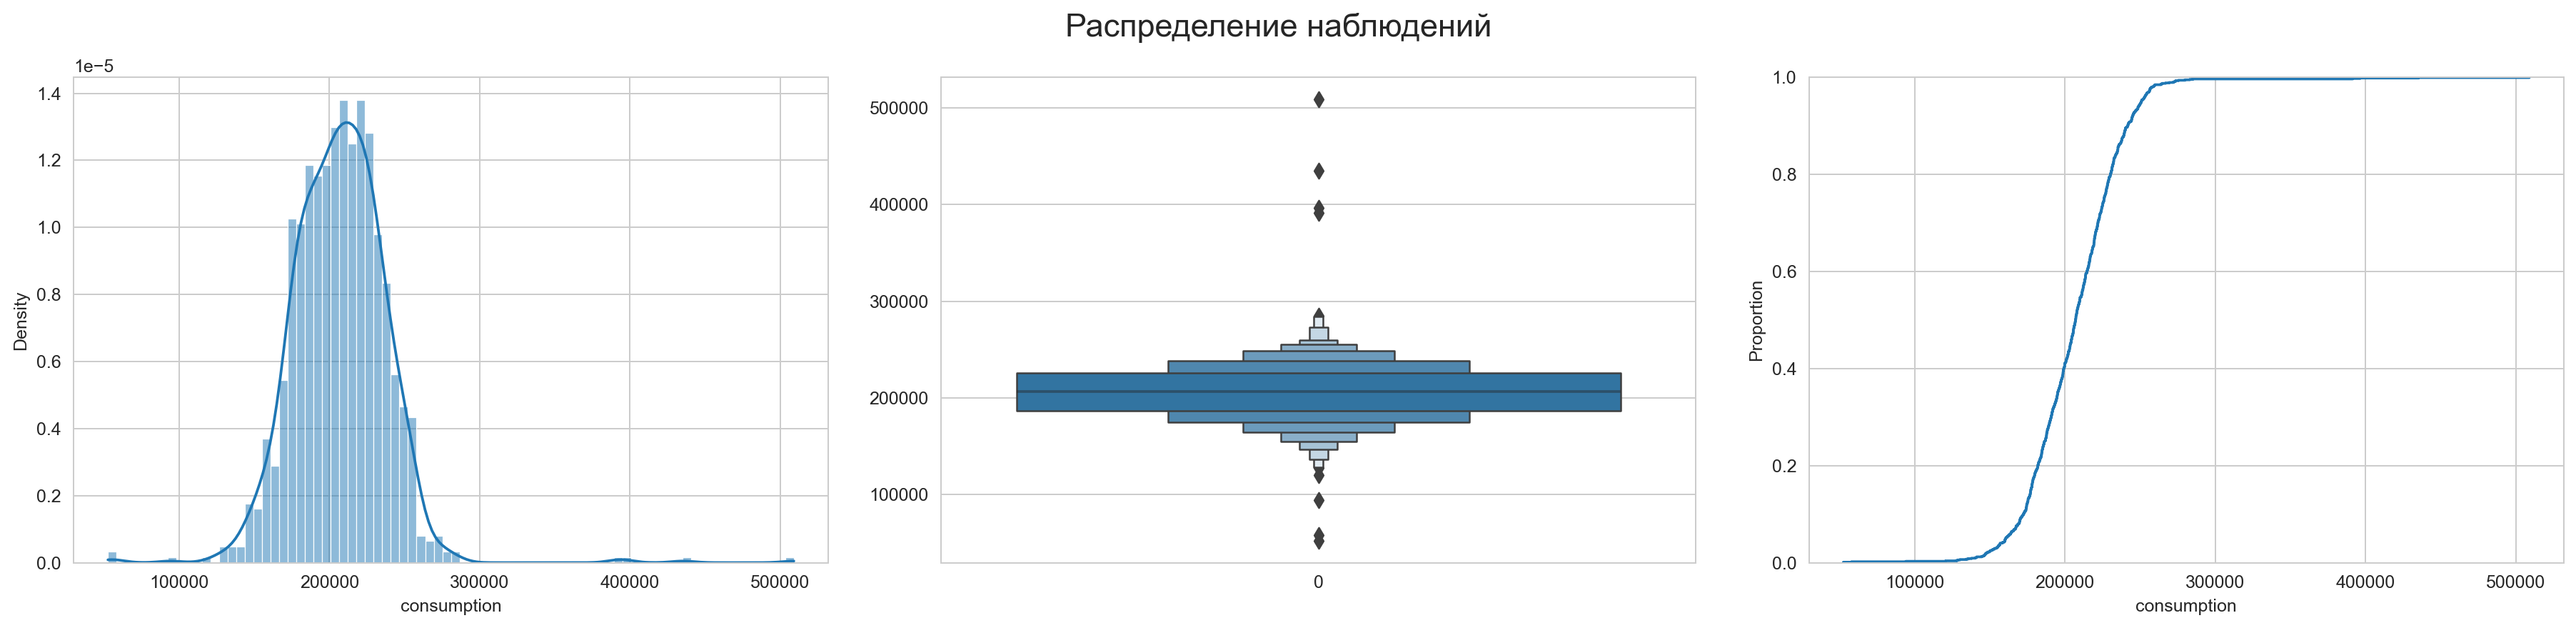

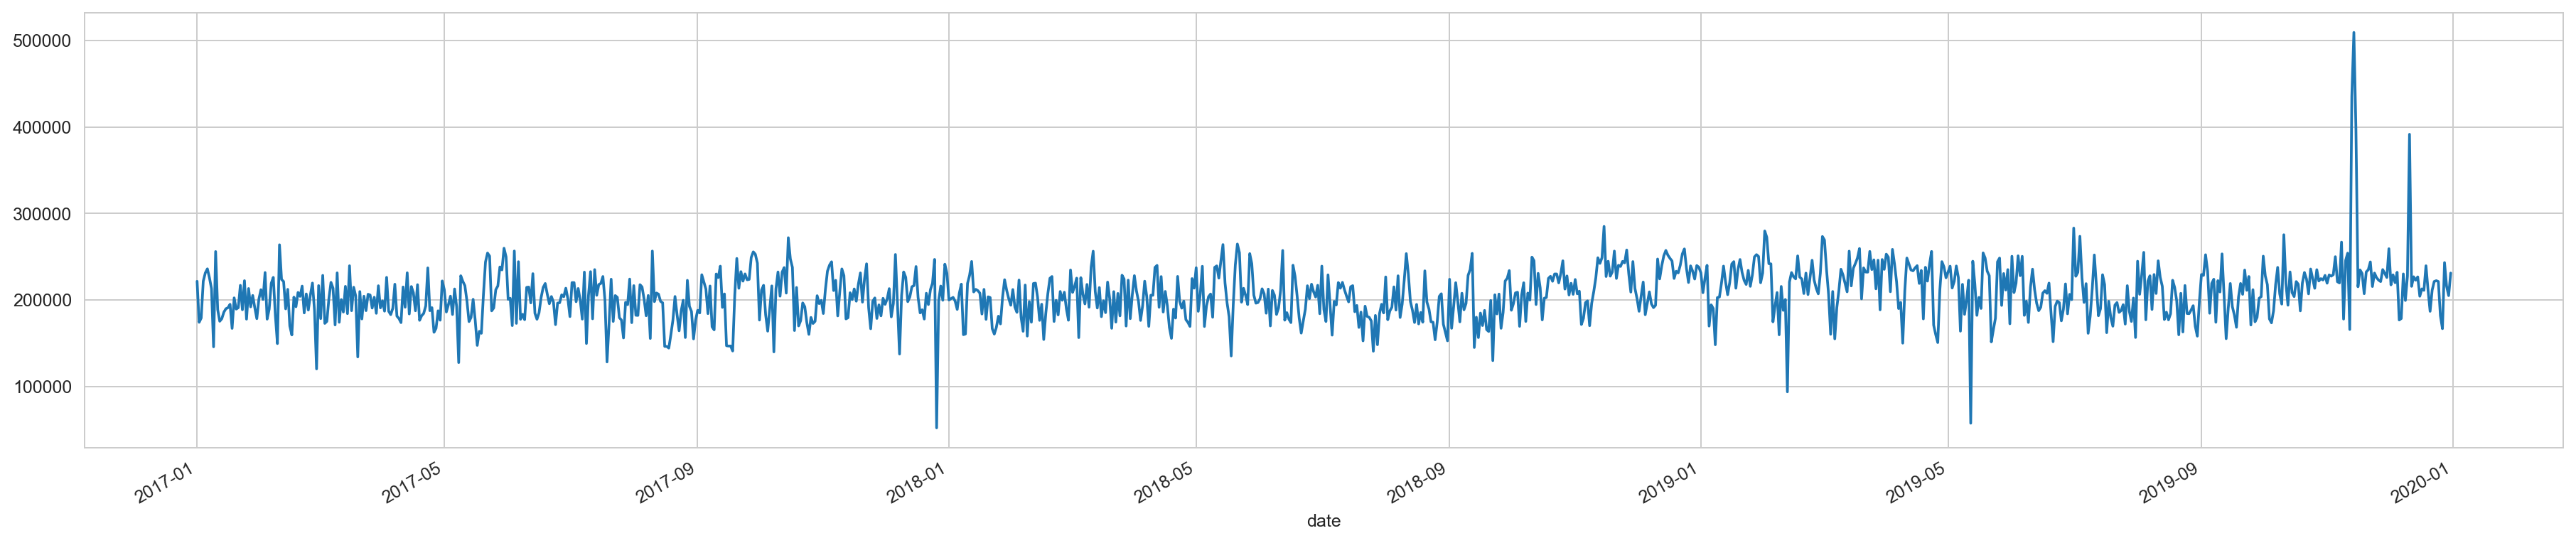

In [35]:
distribution(bada_entering_t1)

#### Бада - Ввод Т2 27.5 кВ

In [ ]:
distribution(bada_entering_t2)

#### Белогорск - Ввод Т1 27.5 кВ

In [ ]:
distribution(belogorsk_entering_t1)

#### Белогорск - Ввод Т2 27.5 кВ

In [ ]:
distribution(belogorsk_entering_t2)

#### Бушулей - Ввод Т1 27.5 кВ

In [ ]:
distribution(bushuley_entering_t1)

#### Бушулей - Ввод Т2 27.5 кВ

In [ ]:
distribution(bushuley_entering_t2)

#### Завитая - Ввод Т1 27.5 кВ

In [ ]:
distribution(zavitaya_entering_t1)

#### Завитая - Ввод Т2 27.5 кВ

In [ ]:
distribution(zavitaya_entering_t2)

#### Зилово - Ввод Т1 27.5 кВ

In [ ]:
distribution(zilovo_entering_t1)

#### Зилово - Ввод Т3 27.5 кВ

In [ ]:
distribution(zilovo_entering_t3)

#### Карымская - Ввод Т6 27.5 кВ

In [ ]:
distribution(karymskaya_entering_t6)

#### Магдагачи - Ввод Т1 27.5 кВ

In [ ]:
distribution(magdagachi_entering_t1)

#### Магдагачи - Ввод Т2 27.5 кВ

In [ ]:
distribution(magdagachi_entering_t2)

#### Могзон - Ввод Т1 27.5 кВ

In [ ]:
distribution(mogzon_entering_t1)

#### Могзон - Ввод Т2 27.5 кВ

In [ ]:
distribution(mogzon_entering_t2)

#### Новая - Ввод Т1 27.5 кВ

In [ ]:
distribution(novaya_entering_t1)

#### Новая - Ввод Т2 27.5 кВ

In [ ]:
distribution(novaya_entering_t2)

### _Time Series Analysis_

---

### Trend analysis

In [36]:
def trend_analysis(substation):
    # ПОСТРОЕНИЕ СКОЛЬЗЯЩИХ СРЕДНИХ
    
    # 7-ми дневное скользящее среднее 
    data_7d_rol = substation.rolling(window = 7, center = True).mean()

    # 30-ми дневное скользящее среднее
    data_30d_rol = substation.rolling(window = 30, center = True).mean()

    # 365-ми дневное скользящее среднее
    data_365d_rol = substation.rolling(window = 365, center = True).mean()
    
    #ПОСТРОЕНИЕ ГРАФИКОВ СКОЛЬЗЯЩИХ СРЕДНИХ 
    
    fig, ax = plt.subplots(figsize = (20,5), dpi= 100)

    # plotting daily data
    ax.plot(substation, marker='*', markersize=2, color='0.6',linestyle='None', label='Daily')

    # Запасной вариант представления
    # ax.plot(novaya_entering_t2, linewidth=2, label='Daily', color='0.6', alpha = 0.5 )

    # plotting 7-day rolling data
    ax.plot(data_7d_rol, linewidth=2, label='7-d Rolling Mean')

    # plotting 30-day rolling data
    ax.plot(data_30d_rol, linewidth=2, label='30-d Rolling Mean')

    # plotting annual rolling data
    ax.plot(data_365d_rol, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

        
    # Beautification of plot
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumption')
    ax.set_title('Trends in Electricity Consumption')

#### Бада - Ввод Т1 27.5 кВ

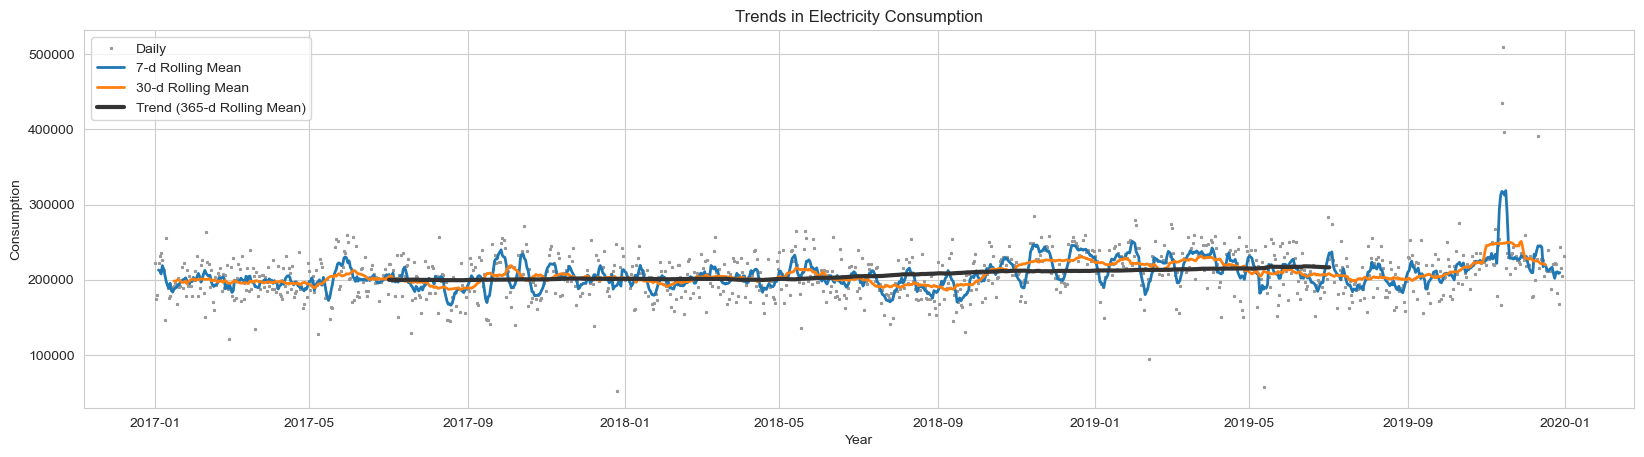

In [37]:
trend_analysis(bada_entering_t1)

#### Бада - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(bada_entering_t2)

#### Белогорск - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(belogorsk_entering_t1)

#### Белогорск - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(belogorsk_entering_t2)

#### Бушулей - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(bushuley_entering_t1)

#### Бушулей - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(bushuley_entering_t2)

#### Завитая - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(zavitaya_entering_t1)

#### Завитая - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(zavitaya_entering_t2)

#### Зилово - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(zilovo_entering_t1)

#### Зилово - Ввод Т3 27.5 кВ

In [ ]:
trend_analysis(zilovo_entering_t3)

#### Карымская - Ввод Т6 27.5 кВ

In [ ]:
trend_analysis(karymskaya_entering_t6)

#### Магдагачи - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(magdagachi_entering_t1)

#### Магдагачи - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(magdagachi_entering_t2)

#### Могзон - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(mogzon_entering_t1)

#### Могзон - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(mogzon_entering_t2)

#### Новая - Ввод Т1 27.5 кВ

In [ ]:
trend_analysis(novaya_entering_t1)

#### Новая - Ввод Т2 27.5 кВ

In [ ]:
trend_analysis(novaya_entering_t2)

### Autocorrelation analysis

In [38]:
def autocorr_analysis(substation):
    from pandas.plotting import autocorrelation_plot
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 3), dpi= 100)
    plt.suptitle("Autocorrelation", fontsize=18)
    
    sm.graphics.tsa.plot_acf(substation.values.squeeze(), lags=50, ax=ax[0])
    sm.graphics.tsa.plot_pacf(substation.values.squeeze(), lags=50, ax=ax[1])
    plt.show()

    fig, ax = plt.subplots(figsize=(19.7, 3), dpi= 100)
    pd.plotting.autocorrelation_plot(substation, ax=ax)
    plt.show()

#### Бада - Ввод Т1 27.5 кВ

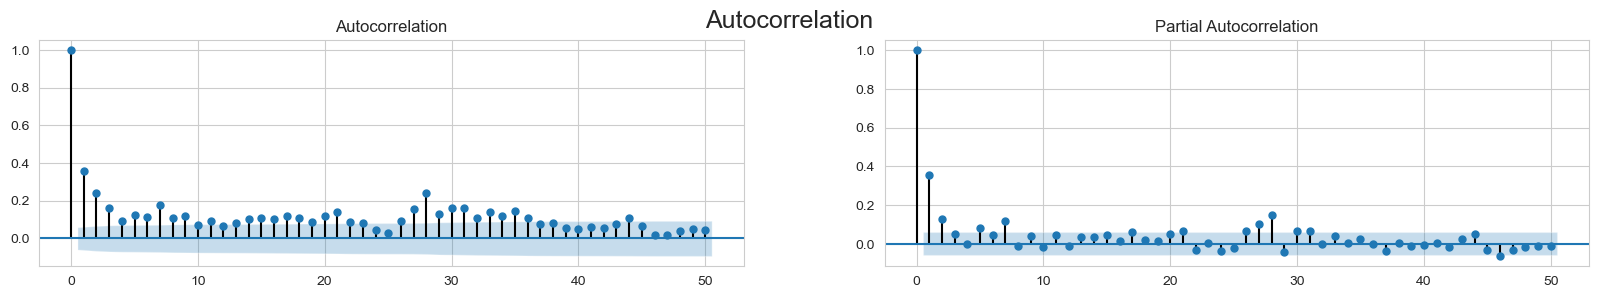

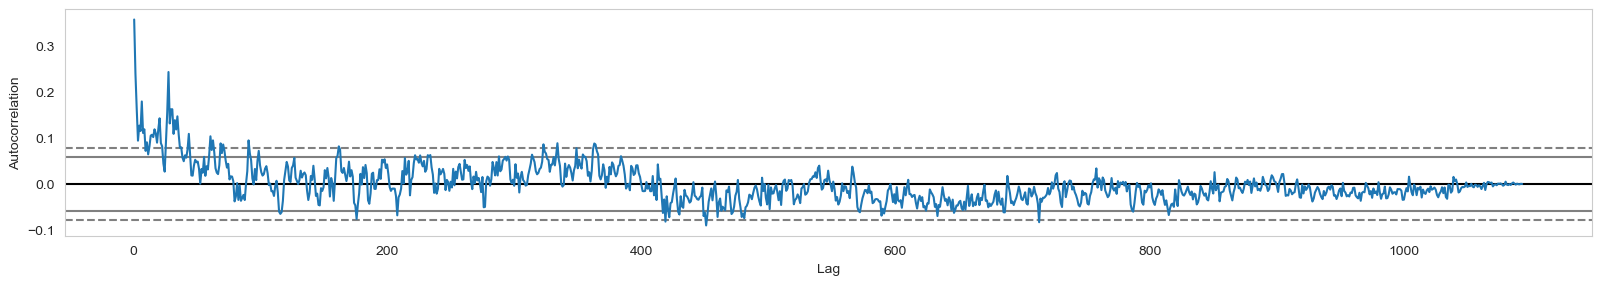

In [39]:
autocorr_analysis(bada_entering_t1)

#### Бада - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(bada_entering_t2)

#### Белогорск - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(belogorsk_entering_t1)

#### Белогорск - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(belogorsk_entering_t2)

#### Бушулей - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(bushuley_entering_t1)

#### Бушулей - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(bushuley_entering_t2)

#### Завитая - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(zavitaya_entering_t1)

#### Завитая - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(zavitaya_entering_t2)

#### Зилово - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(zilovo_entering_t1)

#### Зилово - Ввод Т3 27.5 кВ

In [ ]:
autocorr_analysis(zilovo_entering_t3)

#### Карымская - Ввод Т6 27.5 кВ

In [ ]:
autocorr_analysis(karymskaya_entering_t6)

#### Магдагачи - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(magdagachi_entering_t1)

#### Магдагачи - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(magdagachi_entering_t2)

#### Могзон - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(mogzon_entering_t1)

#### Могзон - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(mogzon_entering_t2)

#### Новая - Ввод Т1 27.5 кВ

In [ ]:
autocorr_analysis(novaya_entering_t1)

#### Новая - Ввод Т2 27.5 кВ

In [ ]:
autocorr_analysis(novaya_entering_t2)

### Analysis of seasonality

In [40]:
def seasonality_analysis(substation, period=120):
    seasonality = sm.tsa.seasonal_decompose(substation, model='additive', period=period).seasonal
    fig, ax = plt.subplots(figsize = (20,5), dpi= 100)
    ax.plot(seasonality)                 

#### Бада - Ввод Т1 27.5 кВ

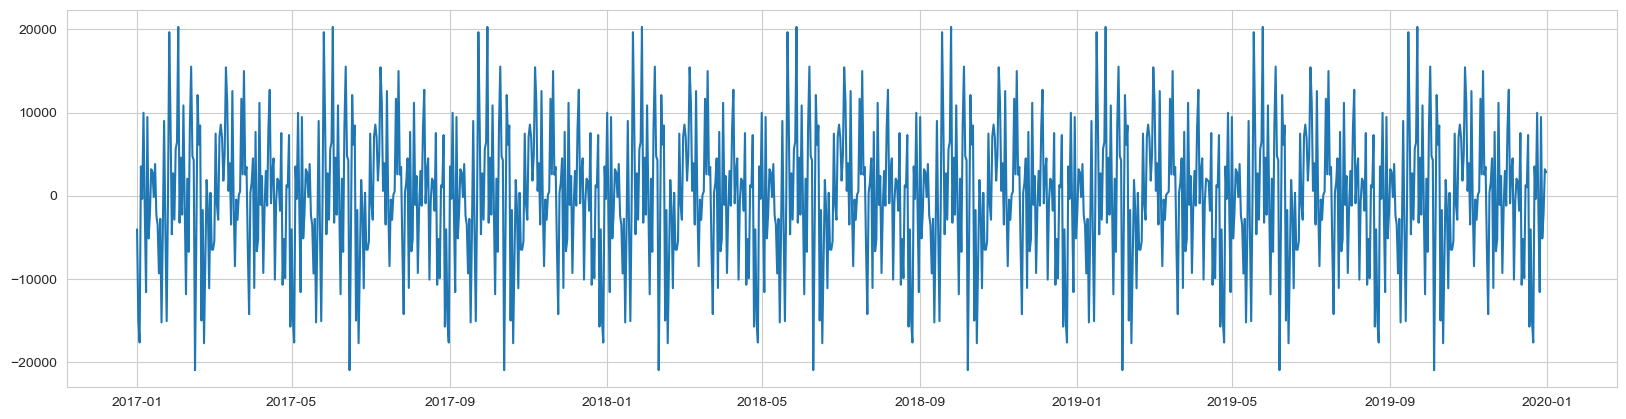

In [41]:
seasonality_analysis(bada_entering_t1)

#### Бада - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(bada_entering_t2)

#### Белогорск - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(belogorsk_entering_t1)

#### Белогорск - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(belogorsk_entering_t2)

#### Бушулей - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(bushuley_entering_t1)

#### Бушулей - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(bushuley_entering_t2)

#### Завитая - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(zavitaya_entering_t1)

#### Завитая - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(zavitaya_entering_t2)

#### Зилово - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(zilovo_entering_t1)

#### Зилово - Ввод Т3 27.5 кВ

In [ ]:
seasonality_analysis(zilovo_entering_t3)

#### Карымская - Ввод Т6 27.5 кВ

In [ ]:
seasonality_analysis(karymskaya_entering_t6)

#### Магдагачи - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(magdagachi_entering_t1)

#### Магдагачи - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(magdagachi_entering_t2)

#### Могзон - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(mogzon_entering_t1)

#### Могзон - Ввод Т2 27.5 кВ

In [ ]:
seasonality_analysis(mogzon_entering_t2)

#### Новая - Ввод Т1 27.5 кВ

In [ ]:
seasonality_analysis(novaya_entering_t1)

#### Новая - Ввод Т2 27.5 кВ

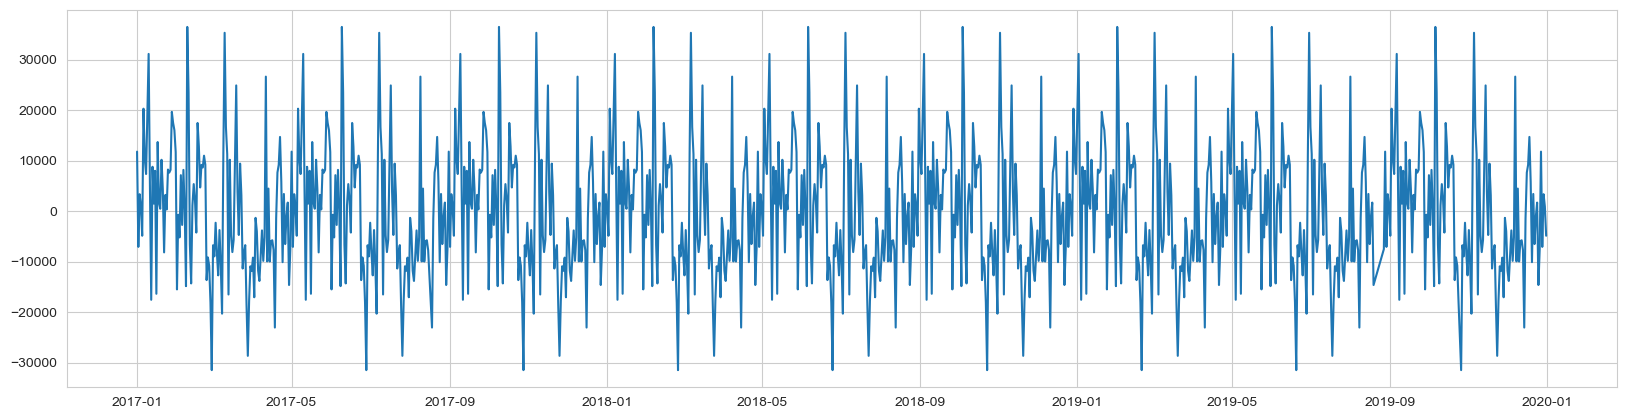

In [42]:
seasonality_analysis(novaya_entering_t2)

In [43]:
test = sm.tsa.adfuller(novaya_entering_t1)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -14.00347072703036
p-value:  3.825055972826949e-26
Critical values:  {'1%': -3.4364137337554785, '5%': -2.864217382986235, '10%': -2.568195530545688}
единичных корней нет, ряд стационарен


### _Outliers detection_

---

In [44]:
novaya_entering_t2

date
2017-01-01    211350
2017-01-02    169961
2017-01-03    153014
2017-01-04    192324
2017-01-05    198986
               ...  
2019-12-27    271830
2019-12-28    259813
2019-12-29    310066
2019-12-30    294505
2019-12-31    288765
Name: consumption, Length: 1085, dtype: int64

In [45]:
from sklearn.ensemble import IsolationForest


def iforest(data, trees, samples):
    
  
    x = data.values
    
    model = IsolationForest(n_estimators=trees, max_samples=samples)
    model.fit(x)
   
    labels = abs(model.decision_function(x))
    plt.scatter(x[:, 0], x[:, 1], c=labels)

    
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(x.min(), x.max(), 100))
    Z = abs(model.decision_function(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cont = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.2)
    
    plt.axis('equal')
    plt.show()

In [46]:


iforest(novaya_entering_t2, trees=10, samples=300)

ValueError: Expected 2D array, got 1D array instead:
array=[211350 169961 153014 ... 310066 294505 288765].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
novaya_entering_t2

F1 = novaya_entering_t2.index(level=1)[:,[0]].reshape(-1,1)
F2 = novaya_entering_t2[:,[1]].reshape(-1,1)

In [ ]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

t=np.linspace(0,10,101).reshape(-1,1)
y_test=0.5+t+t**2+2*np.random.randn(len(t),1)

y_test[10]=y_test[10]*7

plt.figure(1)
plt.plot(t,y_test)
plt.show;

from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(contamination='auto')
pred=clf.fit_predict(y_test)

plt.figure(2)
plt.plot(t[pred==1],y_test[pred==1],'bx')
plt.plot(t[pred==-1],y_test[pred==-1],'ro')
plt.show

from sklearn.ensemble import IsolationForest

clf=IsolationForest(behaviour='new',contamination='auto')
pred=clf.fit_predict(y_test)

plt.figure(3)
plt.plot(t[pred==1],y_test[pred==1],'bx')
plt.plot(t[pred==-1],y_test[pred==-1],'ro')
plt.show

from pyod.models.knn import KNN

clf = KNN()
clf.fit(y_test)
pred=clf.predict(y_test)

plt.figure(4)
plt.plot(t[pred==0],y_test[pred==0],'bx')
plt.plot(t[pred==1],y_test[pred==1],'ro')
plt.show


# Section 4. Conclusions